In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
%matplotlib inline

In [2]:
a = pd.read_csv('train.csv')
b = pd.read_csv('test.csv')
a.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
a.shape

(54808, 14)

In [4]:
b.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [5]:
b.shape

(23490, 13)

In [6]:
a.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [7]:
a.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [8]:
def unqiue_counts(df):
    cols = df.columns
    for c in cols[1:12]:
        print(df[c].value_counts())

In [9]:
a['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [10]:
num_corr = a.corr()
num_corr

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004533,0.001274,-0.002501,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.063126,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.006008,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004533,-0.063126,0.006008,1.000000,0.000253,0.351578,0.027738,0.075139,0.159320
length_of_service,0.001274,-0.057275,0.657111,0.000253,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.002501,-0.045576,-0.025592,0.351578,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,0.008420,-0.007628,-0.008169,0.027738,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,-0.000586,0.042517,-0.048380,0.075139,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.159320,-0.010670,0.221582,0.195871,0.181147,1.000000


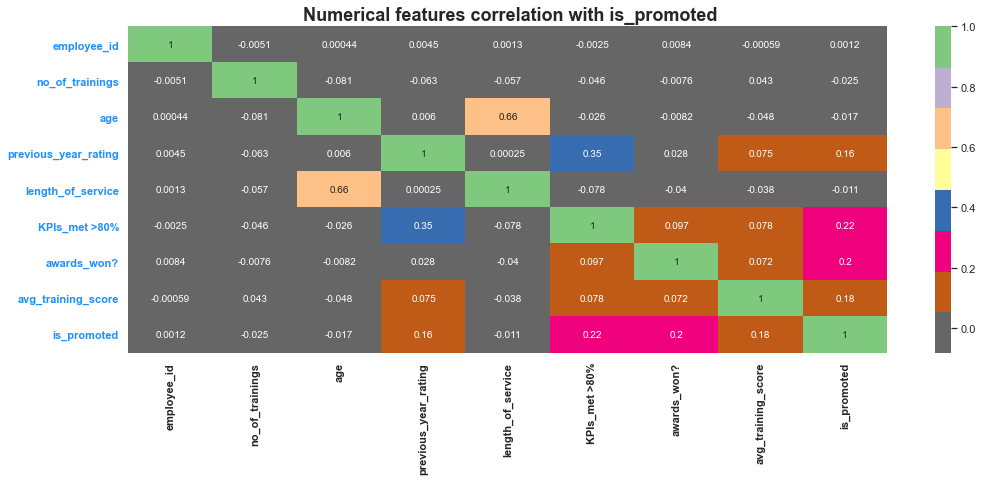

In [11]:
f,ax=plt.subplots(figsize=(17,6))

sns.heatmap(num_corr, cmap='Accent_r', annot = True)
plt.title(" Numerical features correlation with is_promoted", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)
plt.show()

In [12]:
#list(df['department'].value_counts())
a['department'].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

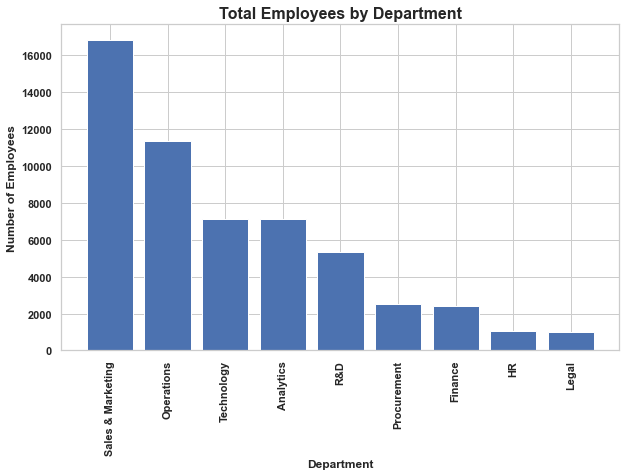

In [13]:
plt.figure(figsize=(10,6))
plt.bar(a['department'].unique(), list(a['department'].value_counts()))
plt.title('Total Employees by Department', weight='bold', fontsize=16)
plt.xlabel('Department', weight='bold', fontsize=12)
plt.ylabel('Number of Employees', weight='bold', fontsize=12)
plt.xticks(weight='bold', rotation='vertical')
plt.yticks(weight='bold')
plt.show()

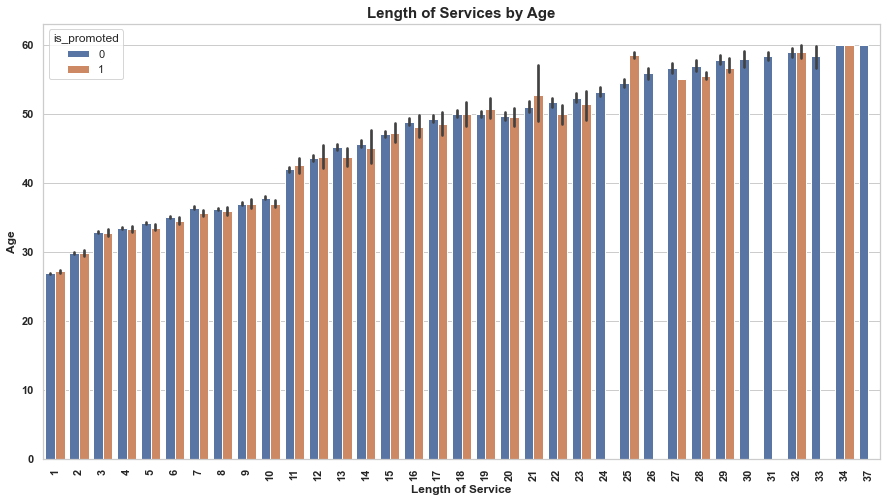

In [14]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=a['length_of_service'], y=a['age'], hue=a['is_promoted'], orient="v", ax=ax)
plt.title('Length of Services by Age', fontsize=15, weight='bold')
plt.xlabel('Length of Service', weight='bold', fontsize=12)
plt.ylabel('Age', weight='bold', fontsize=12)
plt.xticks(weight='bold', rotation='vertical')
plt.yticks(weight='bold')
plt.show()

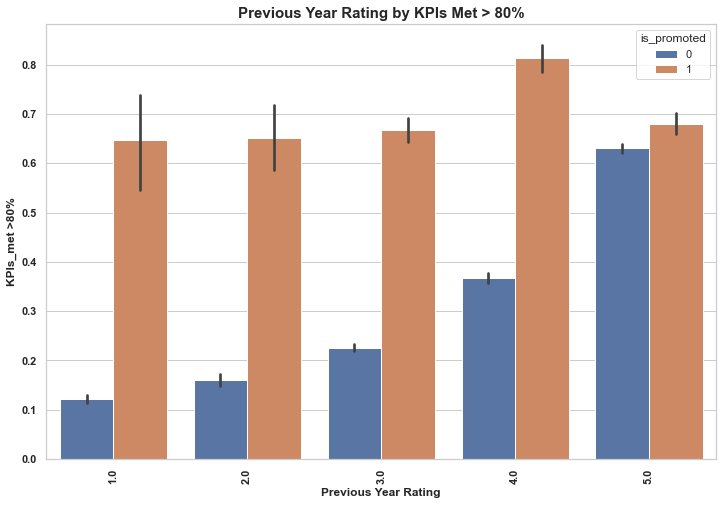

In [15]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=a['previous_year_rating'], y=a['KPIs_met >80%'], hue=a['is_promoted'], orient="v", ax=ax)
plt.title('Previous Year Rating by KPIs Met > 80%', fontsize=15, weight='bold')
plt.xlabel('Previous Year Rating', weight='bold', fontsize=12)
plt.ylabel('KPIs_met >80%', weight='bold', fontsize=12)
plt.xticks(weight='bold', rotation='vertical')
plt.yticks(weight='bold')
plt.show()

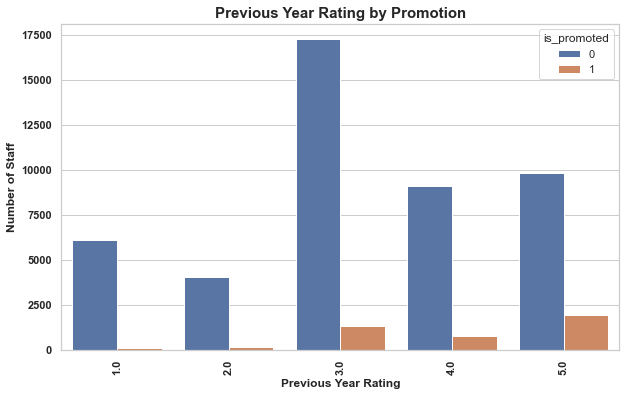

In [16]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x=a['previous_year_rating'], hue=a['is_promoted'], orient="v", ax=ax)
plt.title('Previous Year Rating by Promotion', fontsize=15, weight='bold')
plt.xlabel('Previous Year Rating', weight='bold', fontsize=12)
plt.ylabel('Number of Staff', weight='bold', fontsize=12)
plt.xticks(weight='bold', rotation='vertical')
plt.yticks(weight='bold')
plt.show()

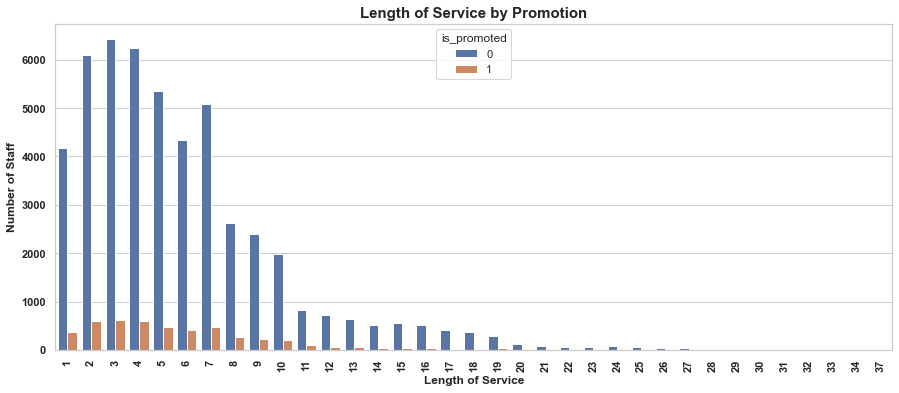

In [17]:
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x=a['length_of_service'], hue=a['is_promoted'], orient="v", ax=ax)
plt.title('Length of Service by Promotion', fontsize=15, weight='bold')
plt.xlabel('Length of Service', weight='bold', fontsize=12)
plt.ylabel('Number of Staff', weight='bold', fontsize=12)
plt.xticks(weight='bold', rotation='vertical')
plt.yticks(weight='bold')
plt.show()

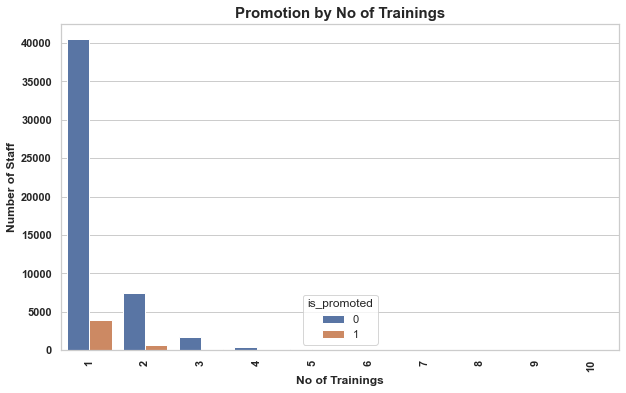

In [18]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x=a['no_of_trainings'], hue=a['is_promoted'], orient="v", ax=ax)
plt.title('Promotion by No of Trainings', fontsize=15, weight='bold')
plt.xlabel('No of Trainings', weight='bold', fontsize=12)
plt.ylabel('Number of Staff', weight='bold', fontsize=12)
plt.xticks(weight='bold', rotation='vertical')
plt.yticks(weight='bold')
plt.show()

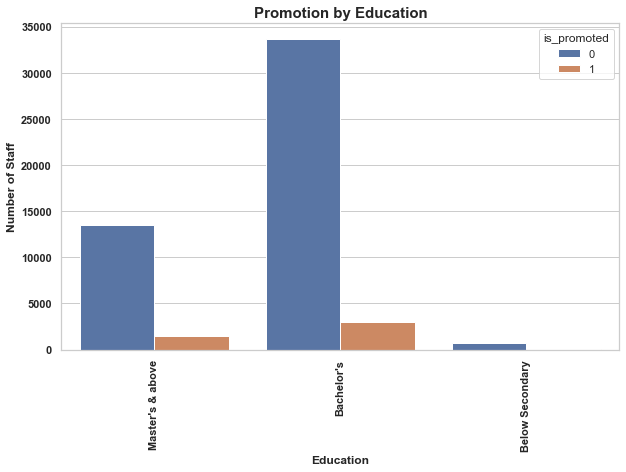

In [19]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x=a['education'], hue=a['is_promoted'], orient="v", ax=ax)
plt.title('Promotion by Education', fontsize=15, weight='bold')
plt.xlabel('Education', weight='bold', fontsize=12)
plt.ylabel('Number of Staff', weight='bold', fontsize=12)
plt.xticks(weight='bold', rotation='vertical')
plt.yticks(weight='bold')
plt.show()

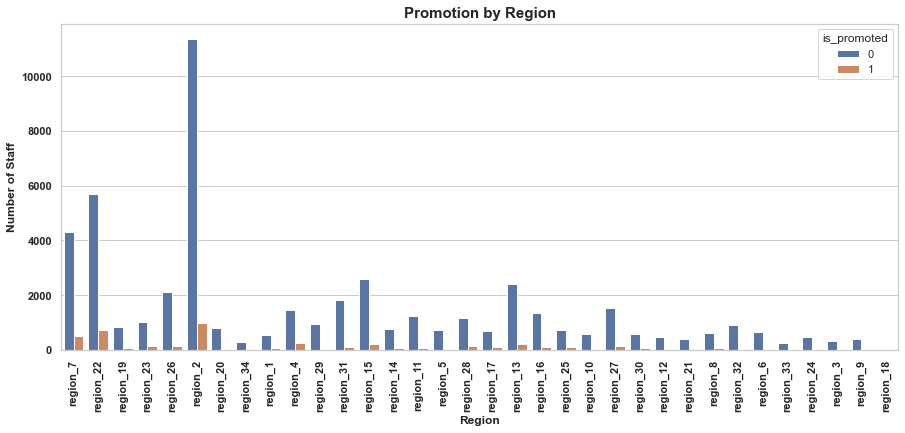

In [20]:
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x=a['region'], hue=a['is_promoted'], orient="v", ax=ax)
plt.title('Promotion by Region', fontsize=15, weight='bold')
plt.xlabel('Region', weight='bold', fontsize=12)
plt.ylabel('Number of Staff', weight='bold', fontsize=12)
plt.xticks(weight='bold', rotation='vertical')
plt.yticks(weight='bold')
plt.show()